# <h1 style="text-align:center; color:blue;">Preprocessing part 1</h1>

- Machine learning preprocessing is a crucial step to prepare raw data for modeling. 
- It typically involves handling missing (NaN) values, dealing with outliers, encoding categorical variables into numerical formats, and scaling features to ensure they are on comparable ranges. 
- Additionally, analyzing correlations between features can help with feature extraction and selection, 
allowing us to focus on the most relevant variables for our model.


# <h3 style="text-align:center; color:blue;">1- Handling missing (NaN) values</h3>

- Missing values, often represented as NaN (Not a Number), are common in real-world datasets and can negatively impact the performance of machine learning models.
- There are several strategies to handle missing data:
- - **Removal:** If only a small number of rows or columns contain missing values, they can be removed from the dataset.
- - **Imputation:** Replace missing values with statistical measures such as the mean, median, or mode of the column, or use more advanced techniques like interpolation or model-based imputation.
- The choice of method depends on the nature of the data and the amount of missing information.


In [1]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with missing values
data : dict = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, np.nan],
    'C': ['cat', 'dog', np.nan, 'cat', 'dog']
}
df: pd.DataFrame= pd.DataFrame(data)
print("Original DataFrame with missing values:")
df


Original DataFrame with missing values:


,A,B,C
0,1.0,NaN,cat
1,2.0,2.0,dog
2,NaN,3.0,NaN
3,4.0,4.0,cat
4,5.0,NaN,dog


In [19]:
# 1. Removal: Drop rows with any missing values
df_dropna: pd.DataFrame = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
df_dropna



DataFrame after dropping rows with missing values:


,A,B,C
1,2.0,2.0,dog
3,4.0,4.0,cat


In [20]:
# 2. Imputation: Fill missing values with mean (for numeric columns)
df_impute_mean: pd.DataFrame = df.copy()
df_impute_mean['A'] = df_impute_mean['A'].fillna(df_impute_mean['A'].mean())
df_impute_mean['B'] = df_impute_mean['B'].fillna(df_impute_mean['B'].mean())
print("\nDataFrame after imputing missing values in 'A' and 'B' with mean:")
df_impute_mean



DataFrame after imputing missing values in 'A' and 'B' with mean:


,A,B,C
0,1.0,3.0,cat
1,2.0,2.0,dog
2,3.0,3.0,NaN
3,4.0,4.0,cat
4,5.0,3.0,dog


In [ ]:
# 3. Imputation: Fill missing values with mode (for categorical columns)
df_impute_mode : pd.DataFrame = df.copy()
mode_c: str = df_impute_mode['C'].mode()[0]
df_impute_mode['C'] = df_impute_mode['C'].fillna(mode_c)
print("\nDataFrame after imputing missing values in 'C' with mode:")
df_impute_mode



DataFrame after imputing missing values in 'C' with mode:


,A,B,C
0,1.0,NaN,cat
1,2.0,2.0,dog
2,NaN,3.0,cat
3,4.0,4.0,cat
4,5.0,NaN,dog


# <h3 style="text-align:center; color:blue;">Outliers</h3>

- Outliers are data points that differ significantly from other observations in a dataset.
- They can occur due to variability in the data, measurement errors, or experimental anomalies.
- Outliers can skew statistical analyses and affect the performance of machine learning models.

- Common methods to detect outliers include:
  - Visualizations: Box plots, scatter plots, and histograms can help identify outliers.
  - Statistical methods: Using the Interquartile Range (IQR), Z-score, or modified Z-score.

- Ways to deal with outliers:
  1. Remove outliers: Exclude them from the dataset if they are due to errors or are not relevant.
  2. Transform data: Apply transformations (e.g., log, square root) to reduce the impact of outliers.
  3. Impute outliers: Replace outlier values with more typical values (e.g., mean, median).
  4. Use robust models: Some algorithms are less sensitive to outliers (e.g., tree-based models).

- The choice of method depends on the context and the reason for the outliers.


In [24]:
import numpy as np
import numpy.typing as npt
import pandas as pd
import matplotlib.pyplot as plt

# Generate new data with numpy
np.random.seed(42)
A: npt.NDArray[np.float64] = np.random.normal(loc=5, scale=1, size=5)
B: npt.NDArray[np.float64] = np.random.normal(loc=3, scale=0.5, size=5)
C: npt.NDArray[np.str_] = np.random.choice(['cat', 'dog'], size=5)

# Introduce an artificial outlier in 'A'
A[0] = 20

df_outlier: pd.DataFrame = pd.DataFrame({'A': A, 'B': B, 'C': C})

print("DataFrame with an artificial outlier in column 'A':")
df_outlier


DataFrame with an artificial outlier in column 'A':


,A,B,C
0,20.000000,2.882932,dog
1,4.861736,3.789606,dog
2,5.647689,3.383717,cat
3,6.523030,2.765263,cat
4,4.765847,3.271280,dog


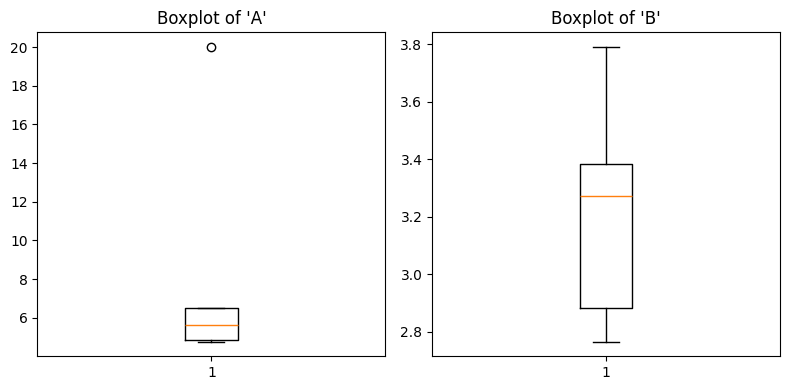

In [8]:
# 1. Visualization: Box plot to detect outliers
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df_outlier['A'])
plt.title("Boxplot of 'A'")

plt.subplot(1, 2, 2)
plt.boxplot(df_outlier['B'])
plt.title("Boxplot of 'B'")
plt.tight_layout()
plt.show()


- The Interquartile Range (IQR) is a measure of statistical dispersion and is used to detect outliers in data.
- It is calculated as the difference between the third quartile (Q3, the 75th percentile) and the first quartile (Q1, the 25th percentile):
-     IQR = Q3 - Q1
- The IQR represents the range within which the central 50% of the data lies.
 
- Outliers are typically defined as data points that fall below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR).
- Tnd upper bounds for outlier detection.hese thresholds are called the lower a



!["IQR"](https://online-learning-college.com/wp-content/uploads/2022/04/Interquartile-range-scaled.jpg)

In [25]:
# 2. Statistical method: Detect outliers using IQR
Q1: float = df_outlier['A'].quantile(0.25)
Q3: float = df_outlier['A'].quantile(0.75)
IQR: float = Q3 - Q1
lower_bound: float = Q1 - 1.5 * IQR
upper_bound: float = Q3 + 1.5 * IQR

outliers: pd.DataFrame = df_outlier[(df_outlier['A'] < lower_bound) | (df_outlier['A'] > upper_bound)]
print("\nDetected outliers in 'A' using IQR method:")
outliers


Detected outliers in 'A' using IQR method:


,A,B,C
0,20.0,2.882932,dog


In [26]:
# 3. Remove outliers
df_no_outliers: pd.DataFrame = df_outlier[(df_outlier['A'] >= lower_bound) & (df_outlier['A'] <= upper_bound)]
print("\nDataFrame after removing outliers in 'A':")
df_no_outliers


DataFrame after removing outliers in 'A':


,A,B,C
1,4.861736,3.789606,dog
2,5.647689,3.383717,cat
3,6.523030,2.765263,cat
4,4.765847,3.271280,dog


In [27]:
# 4. Transform data: Apply log transformation to reduce outlier impact
df_transformed: pd.DataFrame = df_outlier.copy()
df_transformed['A_log'] = np.log1p(df_transformed['A'])  # log1p handles zero/negative values better
df_transformed

,A,B,C,A_log
0,20.000000,2.882932,dog,3.044522
1,4.861736,3.789606,dog,1.768446
2,5.647689,3.383717,cat,1.894269
3,6.523030,2.765263,cat,2.017969
4,4.765847,3.271280,dog,1.751952


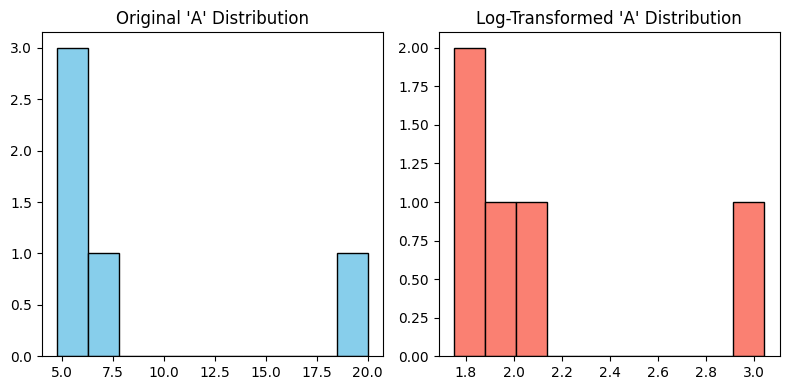

In [14]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(df_outlier['A'], bins=10, color='skyblue', edgecolor='black')
plt.title("Original 'A' Distribution")

plt.subplot(1, 2, 2)
plt.hist(df_transformed['A_log'], bins=10, color='salmon', edgecolor='black')
plt.title("Log-Transformed 'A' Distribution")
plt.tight_layout()
plt.show()

In [28]:
# 5. Impute outlier: Replace outlier with median
median_A: float = df_outlier['A'].median()
df_impute_outlier: pd.DataFrame = df_outlier.copy()
df_impute_outlier.loc[(df_impute_outlier['A'] < lower_bound) | (df_impute_outlier['A'] > upper_bound), 'A'] = median_A
print("\nDataFrame after imputing outlier in 'A' with median:")
df_impute_outlier


DataFrame after imputing outlier in 'A' with median:


,A,B,C
0,5.647689,2.882932,dog
1,4.861736,3.789606,dog
2,5.647689,3.383717,cat
3,6.523030,2.765263,cat
4,4.765847,3.271280,dog
